# CTG Basic Denoise

see: https://physionet.org/physiobank/database/ctu-uhb-ctgdb/
and 'A Comprehensive Feature Analysis of the Fetal Heart Rate Signal for the Intelligent Assessment of Fetal State'

### Signal Preprocessing


In clinical practice, during the recording process using Doppler ultrasound, the FHR signal
contains many artifacts or spikes due to maternal and fetal movements or transducer displacement [1].  Therefore, before further analysis, we eliminated noise to obtain a relatively pure signal for more accurate results, as described in Reference [18].

In this work, we employed a preprocessing involving three steps.  Assume x(i) is an FHR signal with unit of beats per min (bpm) and a frequency of 4 Hz, where i = 1,2, ..., N and N is the number of samples.

- A stable segment is chosen as the starting point; in such a segment, five adjacent samples do not differ by more than 10 bpm, and missing data are excluded when the length of x(i) = 0 is equal or more than 10 s.

- Values of x(i) ≤50 or x(i) ≥ 200  are considered data spikes and are removed using linear interpolation

- We extrapolate x(i) using spline interolation again when the difference between x(i) and x(i-1) exceed 25 bpm, a value used to define unstable segments


Twenty minutes (N = 4800 samples) of signal length was the target used for further continuous
processing in this paper. Taking the signal labeled No. 1001 as a typical example, the result of this artifact removal scheme is presented in Figure 3.

In [1]:
import config_local
from config_common import *

In [2]:
import wfdb
import os
from pprint import pprint

import numpy as np
import matplotlib.pyplot as plt

In [3]:
from ctg_utils import get_all_recno, parse_meta_comments
import basic_denoise
from basic_denoise import get_valid_segments

In [4]:
local_recordings_dir_full

'/Users/Test/Documents/GitHub/CTG_Analysis/local_data/sample_physionet_ctb_uhb_recordings'

In [5]:
!ls /Users/Test/Documents/GitHub/CTG_Analysis/local_data/sample_physionet_ctb_uhb_recordings

1001.dat 1001.hea 1002.dat 1002.hea


# Code

## Process Recordings


Record: 1001
nSamples: 19200


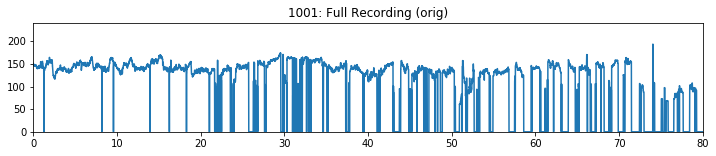

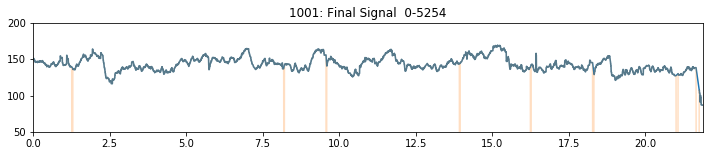

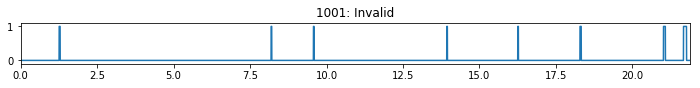

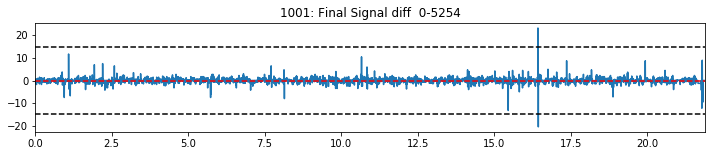

Valid: 98.5%

Record: 1002
nSamples: 19200


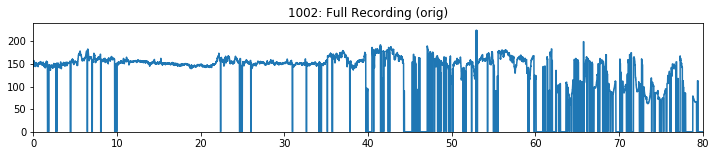

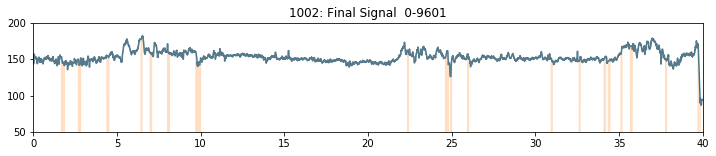

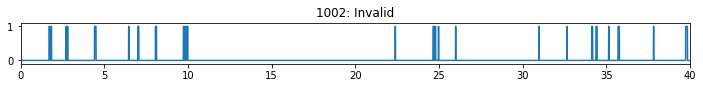

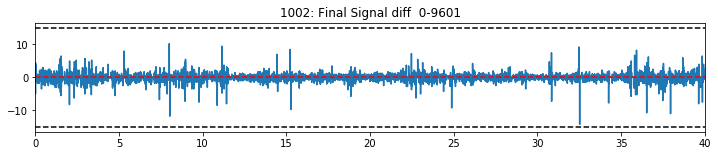

Valid: 97.5%


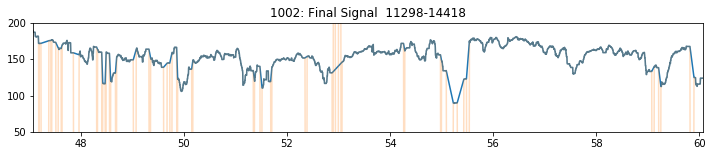

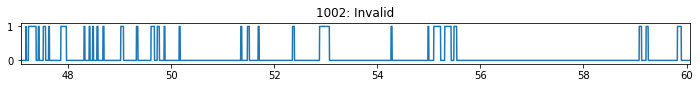

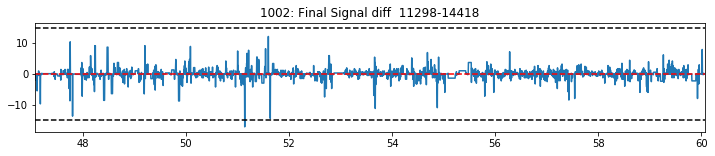

Valid: 88.6%


In [6]:
for recno in sorted(get_all_recno(local_recordings_dir_full)):
    recno_full = os.path.join(local_recordings_dir_full, recno)
    print('\nRecord: {}'.format(recno))
    all_sig, meta = wfdb.io.rdsamp(recno_full)
    print('nSamples: {}'.format(all_sig.shape[0]))
    #pprint(meta['comments'])
    
    orig_hr = all_sig[:, 0]
    sig_hr = np.copy(orig_hr)
    sig_uc = all_sig[:, 1]
    ts = np.arange(len(sig_hr))/4.0

    selected_segments = get_valid_segments(orig_hr, ts, recno, verbose=True)
    continue